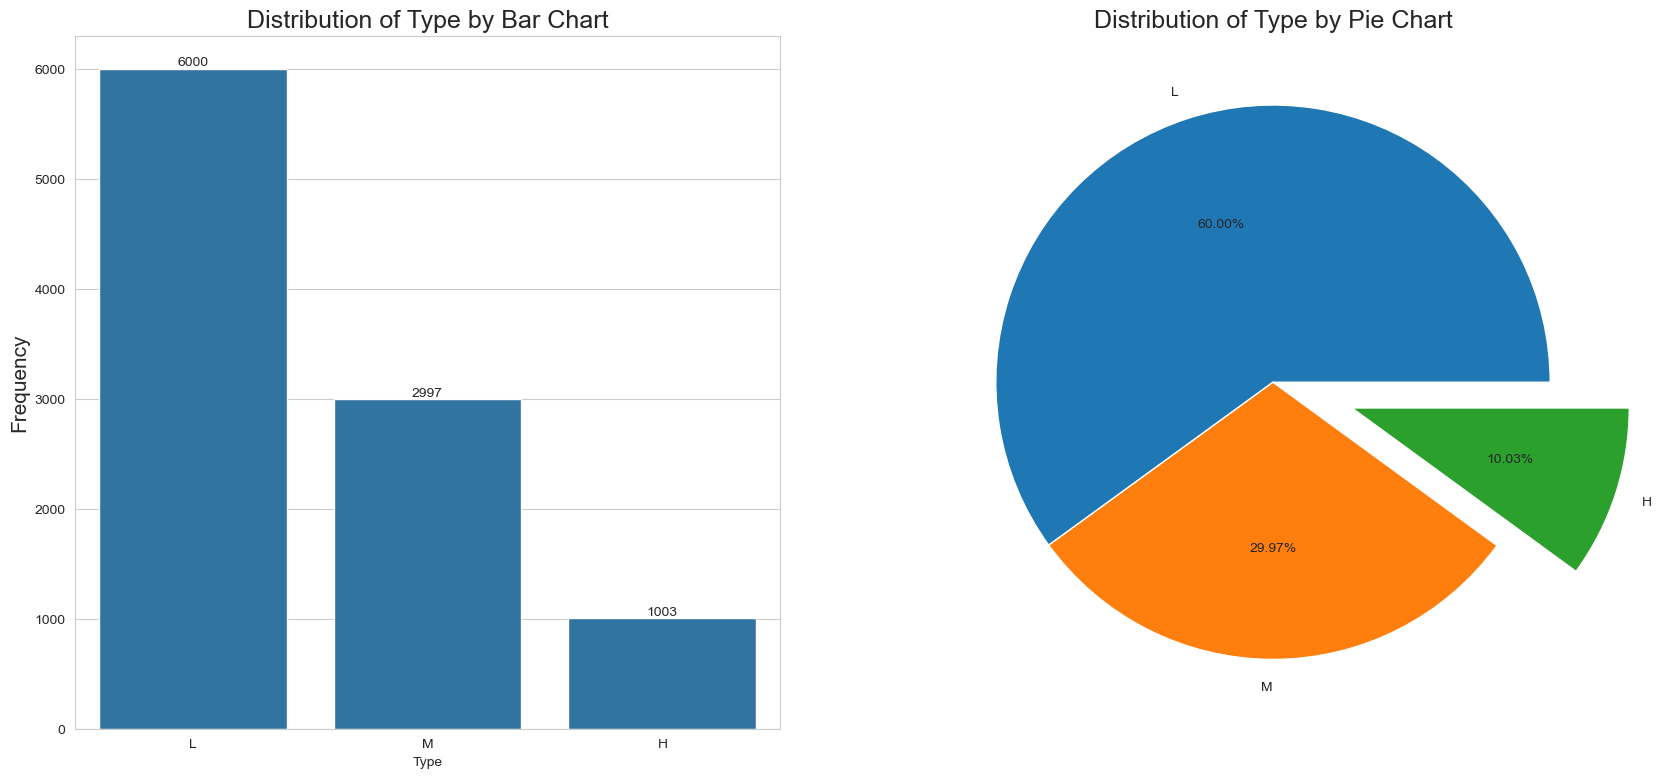

In [63]:
# Import necessary packages
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.tree import DecisionTreeClassifier

pre_data = pd.read_csv('predictive_maintenance.csv')


#drop Unimportant colums
pre_data.drop(["UDI" , "Product ID"] , axis =1  , inplace =True)


ig, ax = plt.subplots(ncols=2, nrows=1, figsize=(20, 9))

# ax[0]
ax[0].set_title("Distribution of Type by Bar Chart", fontdict={"size": 18})
figure = sns.countplot(x=pre_data.Type, ax=ax[0], order=["L", "M", "H"])
for container in figure.containers:
    figure.bar_label(container)
ax[0].set_ylabel("Frequency", fontdict={"size": 15})

# ax[1]
ax[1].set_title("Distribution of Type by Pie Chart", fontdict={"size": 18})
ax[1].pie(x=pre_data.Type.value_counts().values, labels=pre_data.Type.value_counts().index, autopct='%1.2f%%', explode=[0, 0, 0.3])

plt.show()

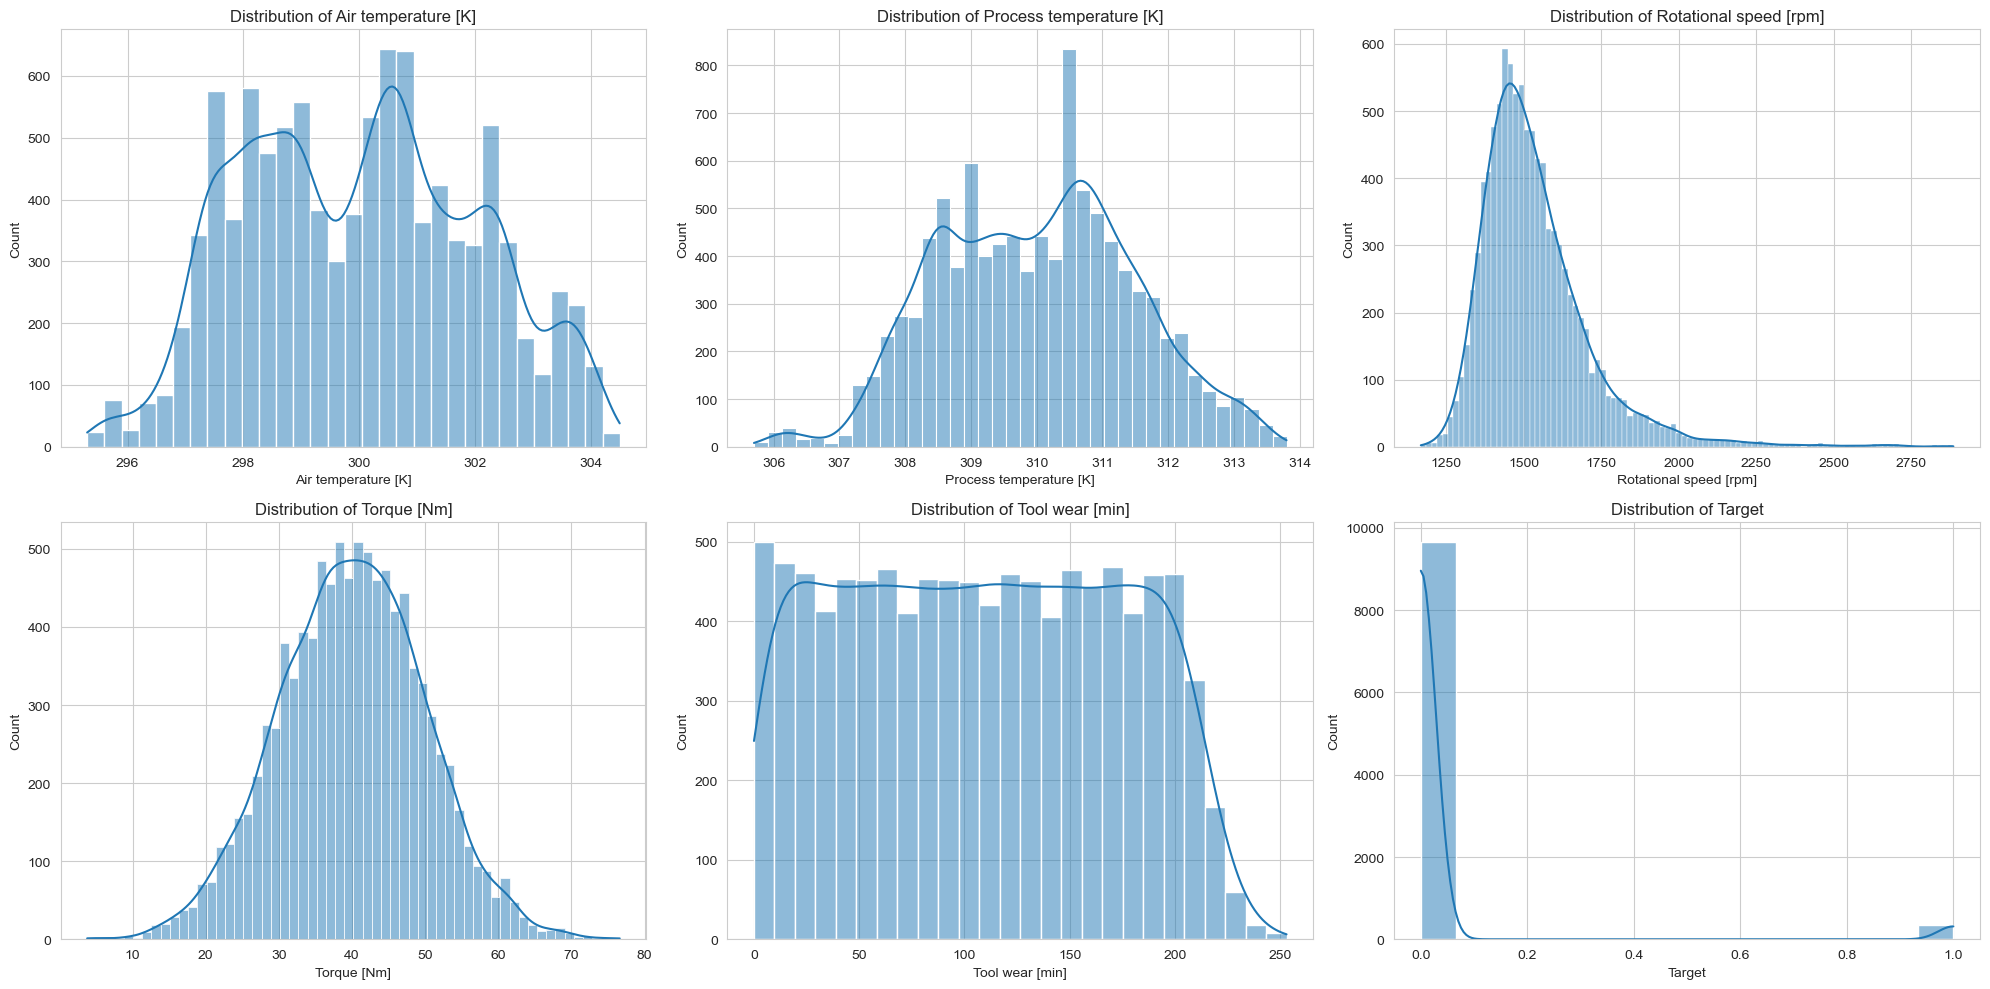

In [26]:
plt.figure(figsize=(20,10))
numerical_columns = pre_data.select_dtypes(include=["float","int"]).columns

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2,3,i)
    sns.histplot(pre_data[col],kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

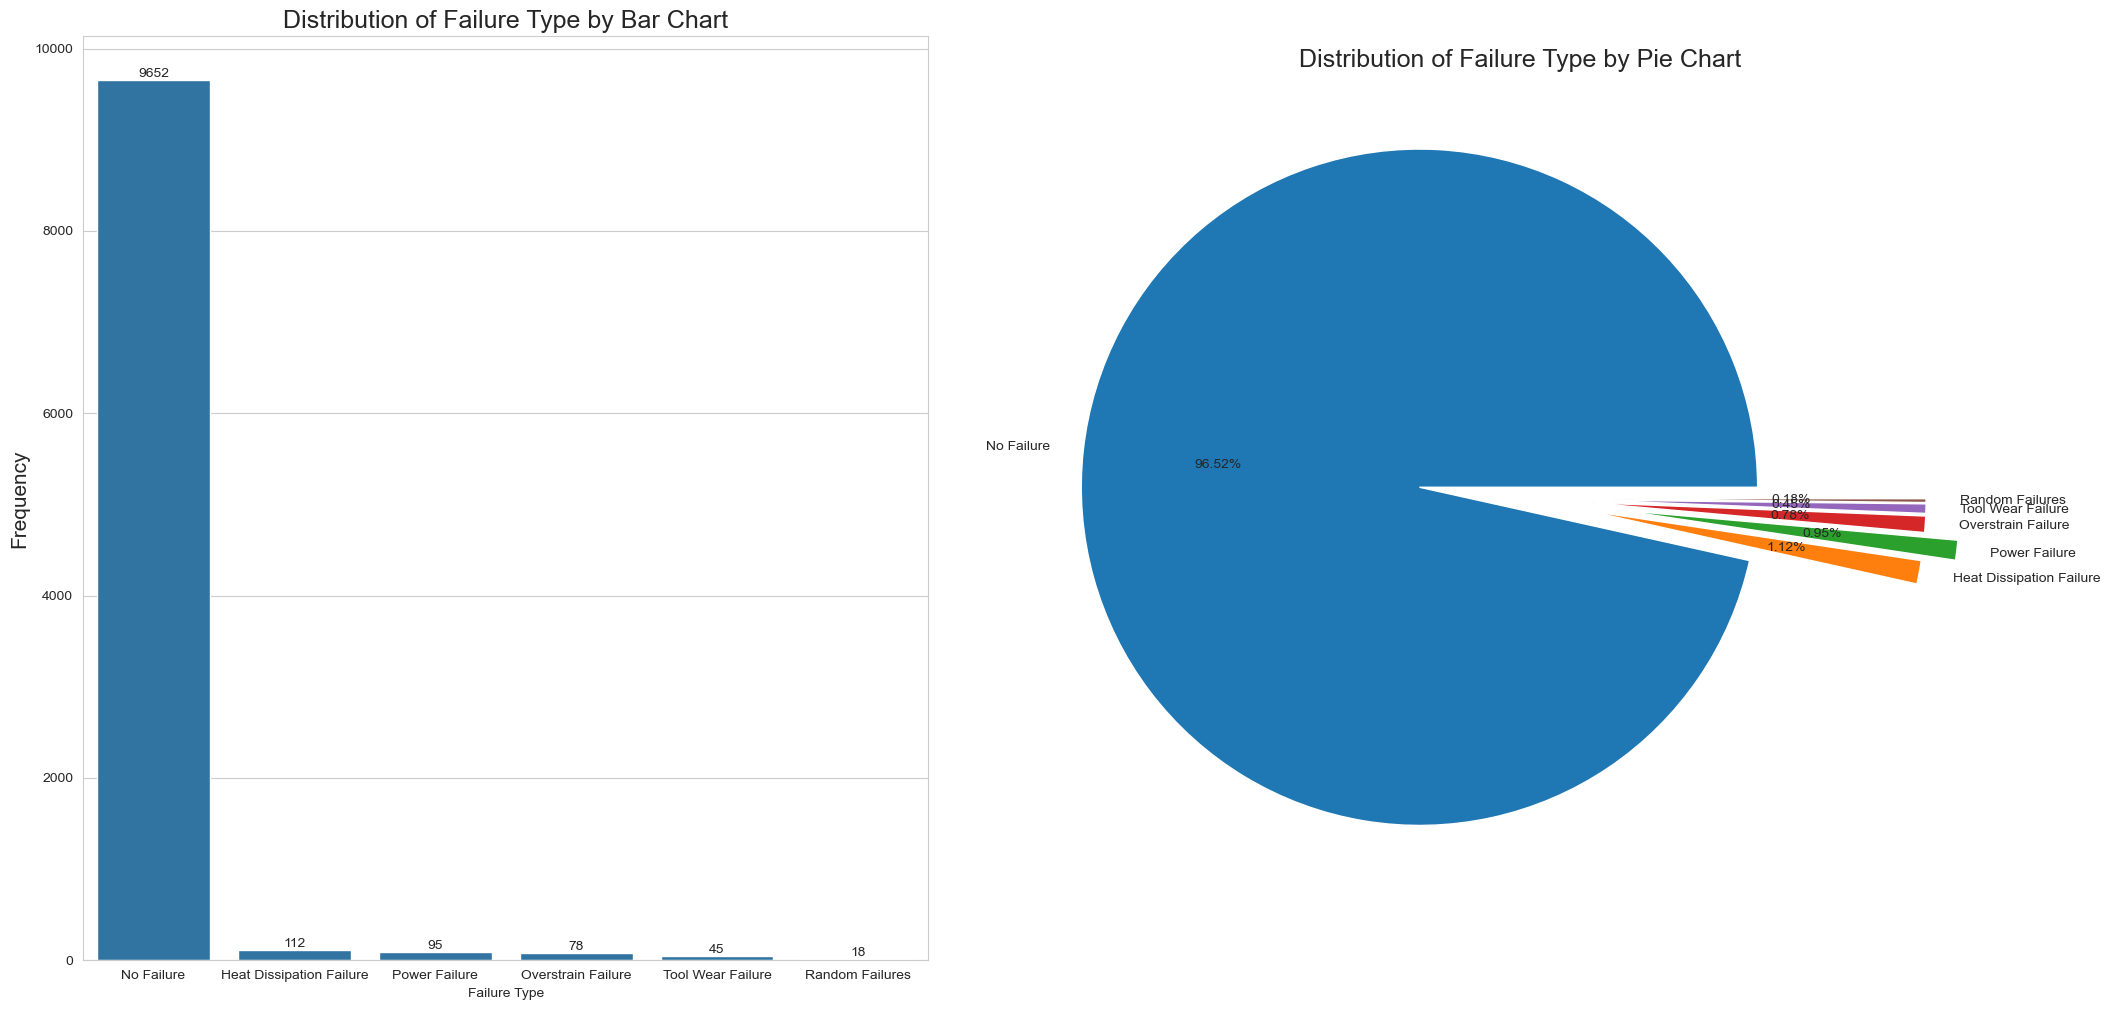

In [41]:
#setup graph plot
fig, ax = plt.subplots(ncols=2,nrows=1, figsize=(24,12))

#first graph for failure type
ax[0].set_title("Distribution of Failure Type by Bar Chart", fontdict={"size":18})
figure = sns.countplot(x=pre_data["Failure Type"],ax=ax[0],order = pre_data["Failure Type"].value_counts().index)

for container in figure.containers:
    figure.bar_label(container)
ax[0].set_ylabel("Frequency", fontdict={"size": 15})

#second graph for failure type
ax[1].set_title("Distribution of Failure Type by Pie Chart", fontdict={"size": 18})
ax[1].pie(x=pre_data["Failure Type"].value_counts().values,
          labels=pre_data["Failure Type"].value_counts().index,
          autopct='%1.2f%%', explode=[.3, 0.2, 0.3 ,.2 ,.2,0.2])

plt.show()

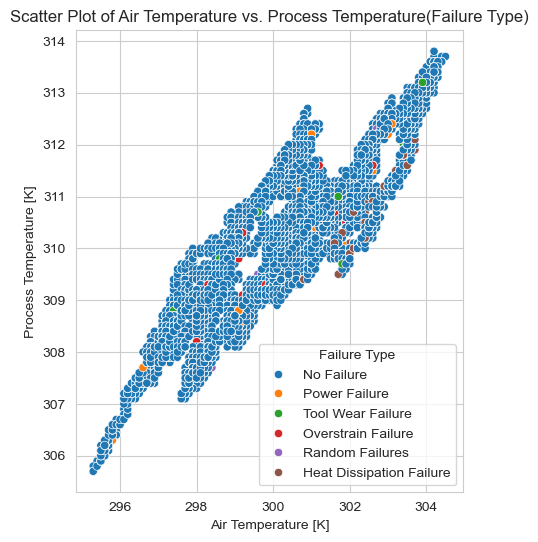

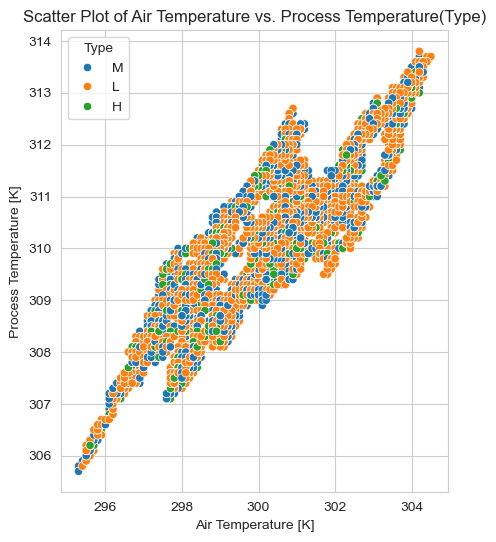

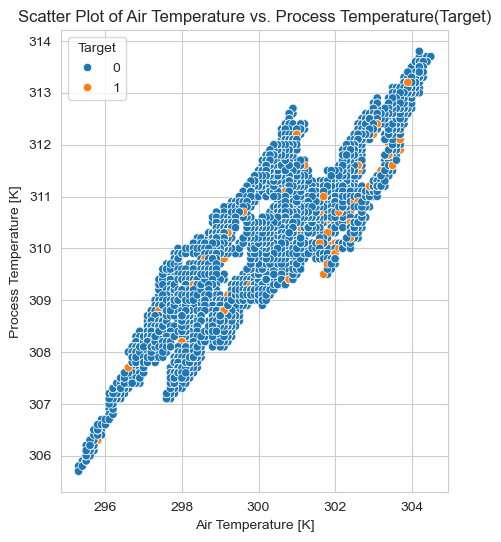

In [69]:
# 3 type of Scatter plot showing the relationship between Air temperature and Process temperature
plt.figure(figsize=(5, 6))
sns.scatterplot(x=pre_data["Air temperature [K]"], y=pre_data["Process temperature [K]"], hue=pre_data["Failure Type"])
plt.title("Scatter Plot of Air Temperature vs. Process Temperature(Failure Type)")
plt.xlabel("Air Temperature [K]")
plt.ylabel("Process Temperature [K]")
plt.legend(title="Failure Type")

plt.figure(figsize=(5, 6))
sns.scatterplot(x=pre_data["Air temperature [K]"], y=pre_data["Process temperature [K]"], hue=pre_data["Type"])
plt.title("Scatter Plot of Air Temperature vs. Process Temperature(Type)")
plt.xlabel("Air Temperature [K]")
plt.ylabel("Process Temperature [K]")
plt.legend(title="Type")

plt.figure(figsize=(5, 6))
sns.scatterplot(x=pre_data["Air temperature [K]"], y=pre_data["Process temperature [K]"], hue=pre_data["Target"])
plt.title("Scatter Plot of Air Temperature vs. Process Temperature(Target)")
plt.xlabel("Air Temperature [K]")
plt.ylabel("Process Temperature [K]")
plt.legend(title="Target")
plt.show()

In [53]:
from sklearn.preprocessing import LabelEncoder
#used to convert categorical text data in the Type and Target columns of a dataset into numerical values.

label_encoder = LabelEncoder()


label_encoder.fit(pre_data['Type'])
pre_data['Type'] = label_encoder.transform(pre_data['Type'])


label_encoder.fit(pre_data['Target'])
pre_data['Target'] = label_encoder.transform(pre_data['Target'])

In [55]:
x=pre_data.drop("Failure Type",axis=1)
y=pre_data["Failure Type"].values

In [56]:
#converts any categorical variables (columns with text or non-numeric values) into dummy/indicator variables.
x = pd.get_dummies(x, drop_first=True)


# Extract the column names after creating dummy variables
col_name = x.columns

In [57]:
x =x.values

In [59]:
#to handle imbalanced data by resampling the dataset
from imblearn.over_sampling import SMOTE
from collections import Counter

# Fit the label encoder on the target variable 'y'
label_encoder.fit(y)

# Transform the target variable 'y' using the fitted label encoder
y = label_encoder.transform(y)

smk = SMOTE(random_state=42)

# Apply SMOTE to the feature set 'x' and target variable 'y' to resample them
X_res, y_res = smk.fit_resample(x, y)

# Convert the resampled target variable 'y_res' to a Pandas Series
y__ = pd.Series(y_res)

# Count the occurrences of each class in the resampled target variable
y__.value_counts()

1    9652
3    9652
5    9652
2    9652
4    9652
0    9652
Name: count, dtype: int64

In [60]:
X_res.shape,y_res.shape
print(f"Orignal Dataset Shape {Counter(y)}")
print(f"Resampled Dataset Shape {Counter(y_res)}")

Orignal Dataset Shape Counter({1: 9652, 0: 112, 3: 95, 2: 78, 5: 45, 4: 18})
Resampled Dataset Shape Counter({1: 9652, 3: 9652, 5: 9652, 2: 9652, 4: 9652, 0: 9652})


In [62]:
# Combine the resampled feature set 'X_res' and the resampled target variable 'y_res' into a single DataFrame
df_new = pd.concat([pd.DataFrame(X_res), pd.DataFrame(y_res)], axis=1)
col_new=col_name
col_new=col_new.to_list()
col_new.append("Failure Type")
df_new.columns=col_new
df_new.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,2.0,298.1,308.6,1551.0,42.8,0.0,0.0,1
1,1.0,298.2,308.7,1408.0,46.3,3.0,0.0,1
2,1.0,298.1,308.5,1498.0,49.4,5.0,0.0,1
3,1.0,298.2,308.6,1433.0,39.5,7.0,0.0,1
4,1.0,298.2,308.7,1408.0,40.0,9.0,0.0,1


In [ ]:
x= df_new.drop("Failure Type" ,axis =1)
y=df_new["Failure Type"]

x = pd.get_dummies(x,drop_first=True)

from sklearn.preprocessing import StandardScaler

# Fit the StandardScaler to the feature set 'x' and transform it
x = StandardScaler().fit_transform(x)

from sklearn.model_selection import train_test_split
x_train , x_test ,y_train ,y_test = train_test_split(x,y ,test_size=.2 ,shuffle=True ,stratify=y)

